In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

## Building an image classifier using keras and tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
keras.__version__

'2.4.0'

In [4]:
tf.__version__

'2.3.1'

## use process:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Returns: 2 tuples:

* x_train, x_test: uint8 array of grayscale image data with shape (num_samples, 28, 28).
* y_train, y_test: uint8 array of labels (integers in range 0-9) with shape (num_samples,).

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

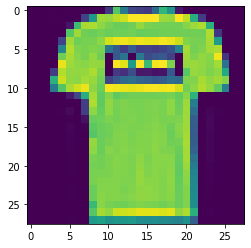

In [6]:
plt.imshow(X_train_full[1])

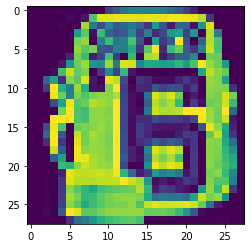

In [7]:
plt.imshow(X_train_full[6000])

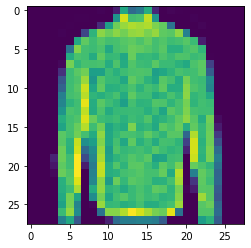

In [8]:
plt.imshow(X_train_full[6001])  

In [9]:
y_train_full[1]

0

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal",
                "Shirt", "Sneaker", "Bag", "Boot"]

In [11]:
class_names[y_train_full[1]]

'T-shirt/top'

In [12]:
X_train_full[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,  22, 118,  24,   0,
          0,   0,   0,   0,  48,  88,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  12, 100, 212, 205, 185,
        179, 173, 186, 193, 221, 142,  85,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  85,  76, 199, 225,
        248, 255, 238, 226, 157,  68,  80,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  91,  69,  91, 201,
        218, 225, 209, 158,  61,  93,  72,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  79,  89,  61,  59,
         87, 108,  75,  56,  76,  97,  73,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  75,  89,  80,  80,
         67,  63,  73,  83,  80,  96,  72,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

## Data normalization

### We normalize the data dimensions so that they are of approximately the same scale 

In [13]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

## Splitting the data into train/validation/test datasets
In the earlier step of importing the date, we had 60,000 datasets for training and 10,000 test datasets. Now we further split the training data into train/validation. Here is how each type of dateset is used in deep learning:
* Training data -- > used for training the model
* validation data --> used for tuning the hyperparameters and evaluate the models
* test data --> used to test the model after the model has gone through initial vetting by the validation set

In [14]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [15]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## create the model architecture

* Sequential model api

* Functional api

In [16]:
np.random.seed(42)
tf.random.set_seed(42)

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


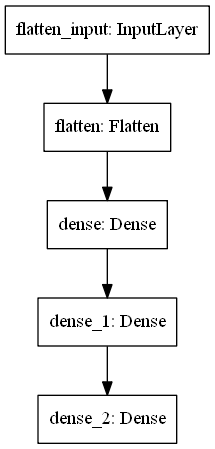

In [20]:
import pydot
keras.utils.plot_model(model)

## Accessing the parameters using get_weight() method

In [21]:
weights, biases = model.layers[1].get_weights()
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [23]:
weights.shape

(784, 300)

In [24]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [25]:
biases.shape

(300,)

## compile method for setting the learning processes

In [26]:
# sparse_categorical_crossentropy bcz of label data form
model.compile(loss = "sparse_categorical_crossentropy", 
               optimizer = "sgd",
               metrics = ["accuracy"])

In [27]:
model_history = model.fit(X_train, y_train, epochs=30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4842 - accuracy: 0.8317 - val_loss: 0.4348 - val_accuracy: 0.8534
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4391 - accuracy: 0.8456 - val_loss: 0.5347 - val_accuracy: 0.7982
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4123 - accuracy: 0.8561 - val_loss: 0.3917 - val_accuracy: 0.8646
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3940 - accuracy: 0.8620 - val_loss: 0.3744 - val_accuracy: 0.8694
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3752 - accuracy: 0.8677 - val_loss: 0.3707 - val_accuracy: 0.8734
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3632 - accuracy: 0.8715 - val_loss: 0.3612 - val_accuracy

In [28]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [30]:
model_history.history

{'loss': [0.7237026691436768,
  0.48419225215911865,
  0.4391198754310608,
  0.41227152943611145,
  0.39399123191833496,
  0.3752003610134125,
  0.3632165193557739,
  0.3516635298728943,
  0.3413761854171753,
  0.3319443464279175,
  0.3239230215549469,
  0.31479373574256897,
  0.3079524636268616,
  0.3021050691604614,
  0.29448434710502625,
  0.28899240493774414,
  0.2838404178619385,
  0.2777338922023773,
  0.27274635434150696,
  0.26731595396995544,
  0.2623072564601898,
  0.25757795572280884,
  0.2533426284790039,
  0.24854010343551636,
  0.24433575570583344,
  0.2404635101556778,
  0.2362230122089386,
  0.23282670974731445,
  0.2284305989742279,
  0.22501768171787262],
 'accuracy': [0.7643091082572937,
  0.831709086894989,
  0.8456000089645386,
  0.856145441532135,
  0.8619636297225952,
  0.8676727414131165,
  0.8714545369148254,
  0.8747090697288513,
  0.8790909051895142,
  0.882381796836853,
  0.8840181827545166,
  0.8865272998809814,
  0.8894000053405762,
  0.8918181657791138,
 

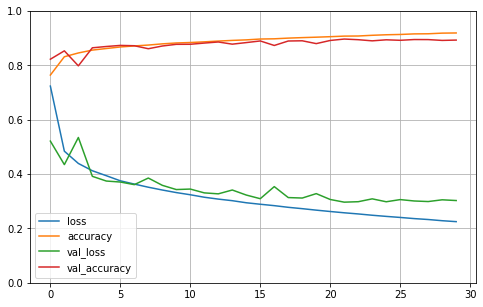

In [31]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [32]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.3374 - accuracy: 0.8825


[0.33740103244781494, 0.8824999928474426]

In [33]:
X_new = X_test[:3]

In [34]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [35]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [36]:
np.array(class_names)[y_pred]

array(['Boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


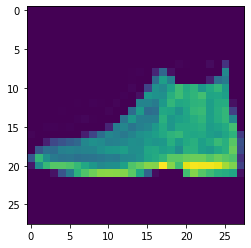

In [37]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


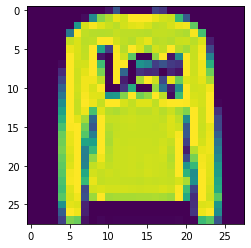

In [38]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


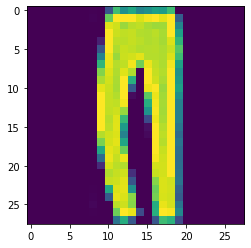

In [39]:
print(plt.imshow(X_test[2]))

## Saving and Restoring to save training model

In [40]:
model.save("my_Func_model.h5")

In [41]:
%pwd

'C:\\Users\\Hacker\\Desktop\\CNN for computer vision with keras and tensorflow in python'

In [60]:
del model

In [43]:
keras.backend.clear_session()

In [44]:
model = keras.models.load_model("my_Func_model.h5")

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [46]:
y_pred = model.predict(X_new)
print(y_pred)

[[4.9138266e-06 3.8828716e-07 9.6161777e-05 9.1610400e-06 4.6785058e-06
  1.0771591e-02 6.3249072e-06 2.9457795e-02 7.1073178e-04 9.5893830e-01]
 [7.7823288e-06 2.3879821e-08 9.8369294e-01 8.9158370e-09 1.6000278e-02
  6.9888392e-12 2.9889063e-04 4.5845988e-12 5.7527538e-09 1.2824002e-11]
 [1.5763442e-06 9.9999797e-01 1.1911291e-08 3.0922021e-07 1.2158139e-07
  1.0305859e-13 3.8656486e-10 1.9780370e-13 6.8292976e-09 1.1178208e-12]]
